Lab 1

Creating a Dataset

In [11]:
import numpy as np

x = np.arange(1, 25).reshape(12, 2)
y = np.array([0,1,1,0,1,0,0,1,1,0,1,0])
print(x)
print(y)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [23 24]]
[0 1 1 0 1 0 0 1 1 0 1 0]


Splitting Our Dataset

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y)

Training Data

In [19]:
x_train

array([[17, 18],
       [15, 16],
       [ 9, 10],
       [23, 24],
       [13, 14],
       [ 5,  6],
       [ 7,  8],
       [ 1,  2],
       [11, 12]])

In [20]:
y_train

array([1, 1, 1, 0, 0, 1, 0, 0, 0])

Testing Data

In [16]:
x_test

array([[19, 20],
       [21, 22],
       [ 3,  4]])

In [21]:
y_test

array([0, 1, 1])

Modify Train Test Split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1000,test_size=0.50,stratify=y)

Training

In [36]:
x_train

array([[15, 16],
       [11, 12],
       [ 7,  8],
       [ 9, 10],
       [17, 18],
       [19, 20]])

In [37]:
y_train

array([1, 0, 0, 1, 1, 0])

Testing

In [38]:
x_test

array([[21, 22],
       [23, 24],
       [ 1,  2],
       [ 3,  4],
       [13, 14],
       [ 5,  6]])

In [39]:
y_test

array([1, 0, 0, 1, 0, 1])

Univariate Linear Regression

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
x = np.arange(20).reshape(-1,1)
y = np.array([5,12,11,19,30,29,23,40,51,54,74,62,68,73,89,84,89,101,99,106])

In [47]:
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [48]:
y

array([  5,  12,  11,  19,  30,  29,  23,  40,  51,  54,  74,  62,  68,
        73,  89,  84,  89, 101,  99, 106])

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=8,random_state=0)

In [51]:
x_train

array([[ 4],
       [ 2],
       [ 5],
       [14],
       [ 9],
       [ 7],
       [16],
       [11],
       [ 3],
       [ 0],
       [15],
       [12]])

In [52]:
x_test

array([[18],
       [ 1],
       [19],
       [ 8],
       [10],
       [17],
       [ 6],
       [13]])

In [54]:
y_train

array([30, 11, 29, 89, 54, 40, 89, 62, 19,  5, 84, 68])

In [55]:
y_test

array([ 99,  12, 106,  51,  74, 101,  23,  73])

y=mx+c

In [56]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

c

In [57]:
model.intercept_

np.float64(3.1617195496417523)

m

In [58]:
model.coef_

array([5.53121801])

Checking Score for Training Data

In [60]:
model.score(x_train,y_train)*100

98.68175024574795

Checking Score for Testing Data

In [63]:
model.score(x_test,y_test)*100

94.65896927715023

Predicting Test Data

In [64]:
y_predict=model.predict(x_test)

Making Data Frame of X & Y

In [68]:
import pandas as pd

x=pd.DataFrame(x, columns=['X'])
y=pd.DataFrame(y, columns=['Y'])

frame=[x,y]
df=pd.concat(frame, axis=1)
df

,X,Y
0,0,5
1,1,12
2,2,11
3,3,19
4,4,30
5,5,29
6,6,23
7,7,40
8,8,51
9,9,54


Predicting Y

In [71]:
model_predict=model.predict(x)
mp=pd.DataFrame(model_predict, columns=['Y_Predict'])

frames=[df,mp]
dfs=pd.concat(frames,axis=1)
dfs

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,X,Y,Y_Predict
0,0,5,3.161720
1,1,12,8.692938
2,2,11,14.224156
3,3,19,19.755374
4,4,30,25.286592
5,5,29,30.817810
6,6,23,36.349028
7,7,40,41.880246
8,8,51,47.411464
9,9,54,52.942682


Mean Absolute Error

In [72]:
from sklearn import metrics

metrics.mean_absolute_error(dfs.Y,dfs.Y_Predict)

3.9822415557830126

Root Mean Squared Error

In [73]:
metrics.root_mean_squared_error(dfs.Y,dfs.Y_Predict)

5.540271621967265

Plotting

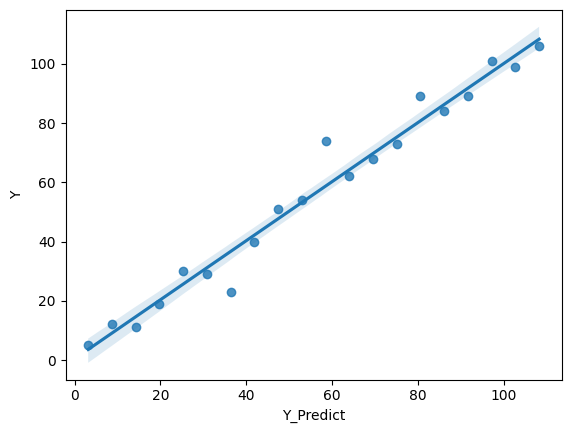

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Y_Predict',y='Y',data=dfs)
plt.show()

Lab 2 (Part 1)

Importing all Library

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import  LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Load and Review Data

In [99]:
cData=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [100]:
cData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [101]:
cData.shape

(3000, 9)

In [102]:
cData=cData.drop({'total_rooms','total_bedrooms','households','median_income'},axis=1)

In [103]:
cData.head()

,longitude,latitude,housing_median_age,population,median_house_value
0,-122.05,37.37,27.0,1537.0,344700.0
1,-118.30,34.26,43.0,809.0,176500.0
2,-117.81,33.78,27.0,1484.0,270500.0
3,-118.36,33.82,28.0,49.0,330000.0
4,-119.67,36.33,19.0,850.0,81700.0


In [104]:
cData.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
population,0
median_house_value,0


In [105]:
cData.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
population,float64
median_house_value,float64


In [106]:
cData.describe()

,longitude,latitude,housing_median_age,population,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,1402.798667,205846.27500
std,1.994936,2.12967,12.555396,1030.543012,113119.68747
min,-124.180000,32.56000,1.000000,5.000000,22500.00000
25%,-121.810000,33.93000,18.000000,780.000000,121200.00000
50%,-118.485000,34.27000,29.000000,1155.000000,177650.00000
75%,-118.020000,37.69000,37.000000,1742.750000,263975.00000
max,-114.490000,41.92000,52.000000,11935.000000,500001.00000


Bivariate Plot

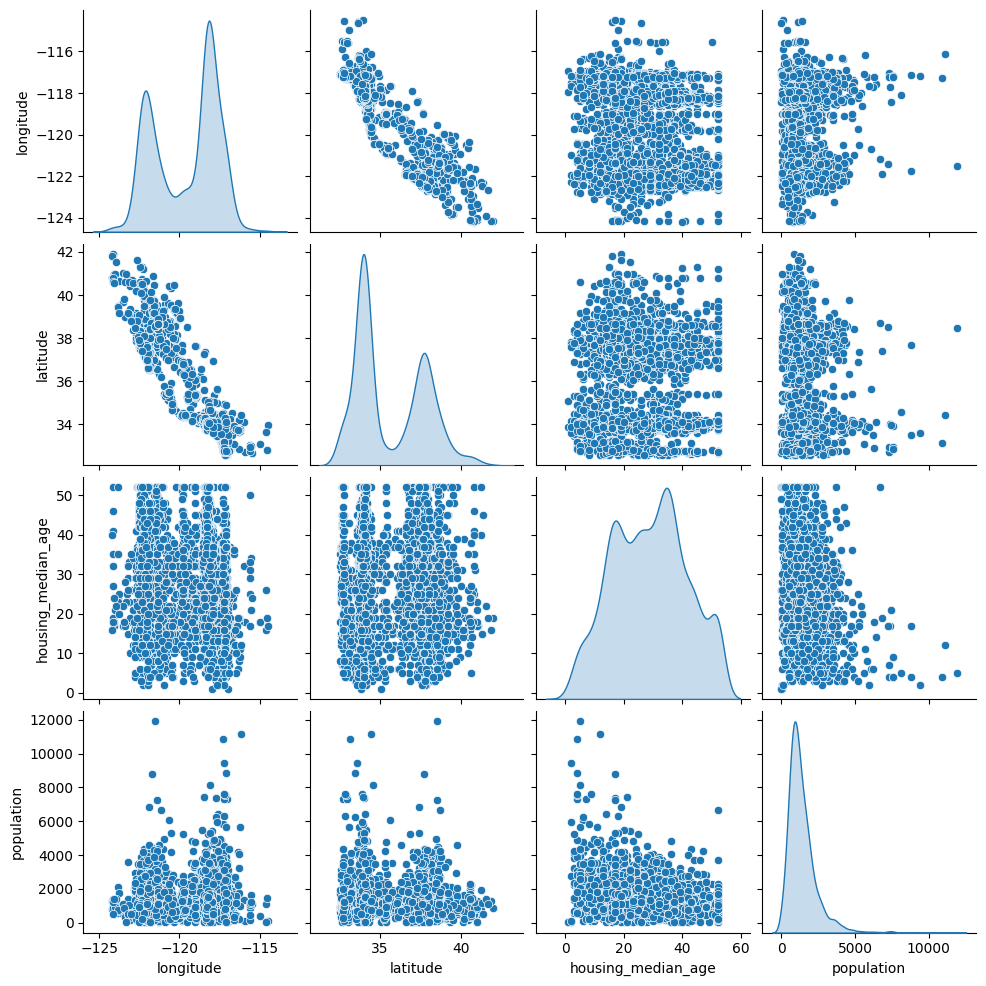

In [109]:
cData_attr=cData.iloc[:,0:4]
sns.pairplot(cData_attr,diag_kind='kde')

In [110]:
cData.corr()

,longitude,latitude,housing_median_age,population,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.111572,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.117318,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.299888,0.091409
population,0.111572,-0.117318,-0.299888,1.000000,-0.001192
median_house_value,-0.050662,-0.138428,0.091409,-0.001192,1.000000


Lab 2 (Part 2)

Split Data

In [158]:
y=cData['median_house_value']
x=cData.drop('median_house_value', axis=1)

In [159]:
y

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0
...,...
2995,225000.0
2996,237200.0
2997,62000.0
2998,162500.0


In [160]:
x

,longitude,latitude,housing_median_age,population
0,-122.05,37.37,27.0,1537.0
1,-118.30,34.26,43.0,809.0
2,-117.81,33.78,27.0,1484.0
3,-118.36,33.82,28.0,49.0
4,-119.67,36.33,19.0,850.0
...,...,...,...,...
2995,-119.86,34.42,23.0,1258.0
2996,-118.14,34.06,27.0,3496.0
2997,-119.70,36.30,10.0,693.0
2998,-117.12,34.10,40.0,46.0


In [178]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.05,random_state=1)

Fit Linear Model (y=mx+c)

In [179]:
regModel=LinearRegression()
ourModel=regModel.fit(xtrain,ytrain)

m Value

In [180]:
regModel.coef_

array([-7.10086169e+04, -6.91541971e+04, -2.35265323e+02, -2.79845565e+00])

c Value

In [181]:
regModel.intercept_

np.float64(-5810353.099383231)

In [182]:
regModel.predict(xtest)

array([215543.81096635, 186425.18840239, 226149.10434179, 234557.84444845,
       229144.43944944, 231311.51670626, 229567.02456646, 232246.86277488,
       261042.44942001, 145632.70743229, 232189.45804598, 258115.32900836,
       236270.91892235, 222907.69566514, 239251.65985338, 223290.89827989,
       157817.7094196 , 228405.63714136, 306002.30199237, 211860.42492232,
       207077.378915  , 211065.14159711, 208927.4241291 , 317755.66404481,
       228059.99914877, 226446.37747535, 215682.0581666 , 118566.82587956,
       260417.48404684, 189731.9364687 , 230204.44691617, 189609.76730603,
       312142.67195454, 213210.45010776,  98243.36715054, 233843.15647328,
       170586.70848147, 211136.13985059, 251754.97748465, 220894.64756374,
       219344.65890729, 217008.22772439, 211506.03948852, 211454.93118309,
        75341.43563916, 223941.75342322, 158696.73577217, 219531.08999658,
       259581.14016968, 236827.92823392, 253538.75947345, 221784.23312057,
       134407.06723656,  

In [183]:
xtest

,longitude,latitude,housing_median_age,population
1957,-118.12,33.99,26.0,1777.0
2087,-117.58,33.87,34.0,773.0
1394,-118.24,33.96,34.0,1101.0
1520,-118.42,33.99,23.0,2847.0
1098,-118.37,34.06,36.0,690.0
...,...,...,...,...
1846,-120.44,34.95,38.0,2601.0
2582,-117.79,34.07,33.0,1689.0
1661,-121.58,39.15,38.0,837.0
306,-122.65,38.23,52.0,712.0


In [123]:
log=float(input("Enter the Longitude:"))
lat=float(input("Enter the Latitude:"))
age=float(input("Enter the House Age:"))
pop=float(input("Enter the Nearby Population:"))
housePrice=regModel.predict(np.array([log,lat,age,pop]).reshape(1,-1))
print("The House Price in this Region is:", housePrice)

Enter the Longitude:-120
Enter the Latitude:33
Enter the House Age:10
Enter the Nearby Population:1000
The House Price in this Region is: [428842.82964992]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
